In [1]:
%load_ext autoreload
%autoreload 2

Following the https://pythonalgos.com/the-best-way-to-do-named-entity-recognition-ner/ article, we will firest install spaCy and download the 'en_core_web_sm' model.

## spaCy example

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.8/458.8 kB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.6/126.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.9/803.9 kB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 5.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Succe

So according to the article we should expect the model to identify 'Molly Moon' as a person, United Nations as a organisation etc...

In [2]:
import spacy
 
nlp = spacy.load("en_core_web_sm")
 
text = "Molly Moon is a cow. She is part of the United Nations Climate Action Committee."
 
doc = nlp(text)
 
for ent in doc.ents:
    print(ent.text, ent.label_)

Molly Moon PERSON
the United Nations Climate Action Committee ORG


Ok this is consistent with the article, its unable separate United Nations & Climate Action Committee.

## NLTK example

In [3]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.8 MB/s eta 0:00:00a 0:00:01


Downloading some libraries as per the article, only run this section once!

In [4]:
import nltk
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package punkt to /home/mick/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mick/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/mick/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /home/mick/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Then using the same text example above, the NLTK model is able to separate United Nations but incorrectly tags Climate Action Commitee as a person. Again this is consistent with the article.

In [5]:
import nltk
from nltk.chunk import tree2conlltags
 
text = "Molly Moon is a cow. She is part of the United Nations' Climate Action Committee."
 
tokenized = nltk.word_tokenize(text)
pos_tagged = nltk.pos_tag(tokenized)
chunks = nltk.ne_chunk(pos_tagged)
for chunk in chunks:
    if hasattr(chunk, 'label'):
        print(chunk)

(PERSON Moon/NNP)
(ORGANIZATION United/NNP Nations/NNP)
(PERSON Climate/NNP Action/NNP Committee/NNP)


## Sharon's example

In [35]:
terms = dict()

In [36]:
text ="Mining and resources companies were given an extraordinary level of access to the highest rungs of the New South Wales government in the past four years, securing roughly 188 meetings with ministers in 235 weeks. An analysis of four and a half years of the state’s ministerial diaries shows the NSW Minerals Council has obtained regular access to resources, planning and finance ministers, and the offices of premiers and deputy premiers. The council was given 61 meetings with NSW ministers, more than anyone except the NSW Farmers Association, the City of Sydney council and Penrith city council. Further meetings were granted to multinational resource and energy companies such as Shenhua, Whitehaven, Glencore, AGL, Rio Tinto, BHP, Origin Energy, Santos, Anglo American and Centennial Coal."

tokenized = nltk.word_tokenize(text)
pos_tagged = nltk.pos_tag(tokenized)
chunks = nltk.ne_chunk(pos_tagged)

for chunk in chunks:
    if hasattr(chunk, 'label'):
        value = chunk[0][0]
        if value not in terms.keys():
            terms[value] = [chunk.label(), ""]
        print(chunk)

(GPE Mining/NN)
(ORGANIZATION New/NNP South/NNP Wales/NNP)
(ORGANIZATION NSW/NNP Minerals/NNP Council/NNP)
(ORGANIZATION NSW/NNP)
(ORGANIZATION NSW/NNP Farmers/NNP Association/NNP)
(ORGANIZATION City/NNP)
(GPE Sydney/NNP)
(GPE Penrith/NNP)
(ORGANIZATION Shenhua/NNP)
(GPE Whitehaven/NNP)
(PERSON Glencore/NNP)
(ORGANIZATION AGL/NNP)
(PERSON Rio/NNP Tinto/NNP)
(ORGANIZATION BHP/NNP)
(PERSON Origin/NNP Energy/NNP)
(GPE Santos/NNP)
(PERSON Anglo/NNP American/NNP)
(ORGANIZATION Centennial/NNP Coal/NNP)


What if we try spaCy on this sentance?

In [37]:
doc = nlp(text)
 
for ent in doc.ents:
    if ent.text not in terms.keys():
        terms[ent.text] = ["", ent.label_]
    else:
        terms[ent.text][1] = ent.label_
    print(ent.text, ent.label_)

the New South Wales LOC
the past four years DATE
roughly 188 CARDINAL
235 weeks DATE
four and a half years DATE
the NSW Minerals Council ORG
61 CARDINAL
the NSW Farmers Association ORG
the City of Sydney council GPE
Penrith GPE
Shenhua, Whitehaven, Glencore ORG
AGL ORG
Rio Tinto GPE
BHP ORG
Origin Energy PERSON
Santos ORG
Anglo American NORP
Centennial Coal PERSON


In [38]:
for key in terms.keys():
    if len(terms[key]) < 2:
        terms[key].append("")

import pandas as pd
terms_df = pd.DataFrame(terms).T.reset_index()
terms_df.columns = ['term', 'nltk_label', 'spacy_label']
terms_df

,term,nltk_label,spacy_label
0,Mining,GPE,
1,New,ORGANIZATION,
2,NSW,ORGANIZATION,
3,City,ORGANIZATION,
4,Sydney,GPE,
5,Penrith,GPE,GPE
6,Shenhua,ORGANIZATION,
7,Whitehaven,GPE,
8,Glencore,PERSON,
9,AGL,ORGANIZATION,ORG


## Using Guardian API



In [2]:
guardian_api_key = "<put your key here>"
import requests as r

response = r.get(f'https://content.guardianapis.com/search?section=australia-news&q=xstrata&api-key={guardian_api_key}')
data = response.json()
data

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 9,
  'startIndex': 1,
  'pageSize': 10,
  'currentPage': 1,
  'pages': 1,
  'orderBy': 'relevance',
  'results': [{'id': 'australia-news/2020/aug/15/new-acland-coalmine-alps-environment-lobby-urges-queensland-not-to-approve-expansion',
    'type': 'article',
    'sectionId': 'australia-news',
    'sectionName': 'Australia news',
    'webPublicationDate': '2020-08-14T20:00:24Z',
    'webTitle': "New Acland coalmine: ALP's environment lobby urges Queensland not to approve expansion",
    'webUrl': 'https://www.theguardian.com/australia-news/2020/aug/15/new-acland-coalmine-alps-environment-lobby-urges-queensland-not-to-approve-expansion',
    'apiUrl': 'https://content.guardianapis.com/australia-news/2020/aug/15/new-acland-coalmine-alps-environment-lobby-urges-queensland-not-to-approve-expansion',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'australia-news/2015/dec/17/ato-rep

In [4]:
for article in data["response"]["results"]:
    url = f'{article["apiUrl"]}?api-key={guardian_api_key}&show-fields=bodyText'
    article_content = r.get(url).json()
    # this is the article text
    body_text = article_content["response"]['content']['fields']['bodyText']
    print(body_text)

Labor’s internal environment lobby has called on the Queensland government not to approve the expansion of the controversial New Acland coalmine on the Darling Downs – a project that has become an increasingly vexed election issue for the party. This week, the mining union threatened to withdraw its campaign support for Labor at the upcoming Queensland election over the ongoing uncertainty about the proposed expansion. The federal Labor MPs Joel Fitzgibbon, Shane Neumann and Anthony Chisholm have each urged the state to approve the New Acland expansion. The federal Labor leader, Anthony Albanese, has criticised the approvals process as taking “an extraordinary long period of time”. Next to the Adani coalmine proposal, the New Acland expansion has become a significant touchstone for the broader debate about coal, climate and the environment in Queensland. The state government has been waiting until the outcome of a high court appeal by farming and environmental groups before making the 

In [7]:
article_content = r.get(f'{data["response"]["results"][0]["apiUrl"]}?api-key={guardian_api_key}&show-fields=bodyText')
article_content.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'content': {'id': 'australia-news/2020/aug/15/new-acland-coalmine-alps-environment-lobby-urges-queensland-not-to-approve-expansion',
   'type': 'article',
   'sectionId': 'australia-news',
   'sectionName': 'Australia news',
   'webPublicationDate': '2020-08-14T20:00:24Z',
   'webTitle': "New Acland coalmine: ALP's environment lobby urges Queensland not to approve expansion",
   'webUrl': 'https://www.theguardian.com/australia-news/2020/aug/15/new-acland-coalmine-alps-environment-lobby-urges-queensland-not-to-approve-expansion',
   'apiUrl': 'https://content.guardianapis.com/australia-news/2020/aug/15/new-acland-coalmine-alps-environment-lobby-urges-queensland-not-to-approve-expansion',
   'fields': {'bodyText': 'Labor’s internal environment lobby has called on the Queensland government not to approve the expansion of the controversial New Acland coalmine on the Darling Downs – a project that has become an increas

## Move along nothing to see here...

Moving on to another article: https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

This article looks like it goes into more depth on the topic of NER, so using the same example which is a sentance taken from a NY times article, and we first do part of speech tagging.

In [10]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.0 MB/s eta 0:00:00


In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

# This function does the part of speech tagging
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

sent = preprocess(ex)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

Now we’ll implement noun phrase chunking to identify named entities using a regular expression consisting of rules that indicate how sentences should be chunked.

*read the article, it goes into more detail about that this means...*

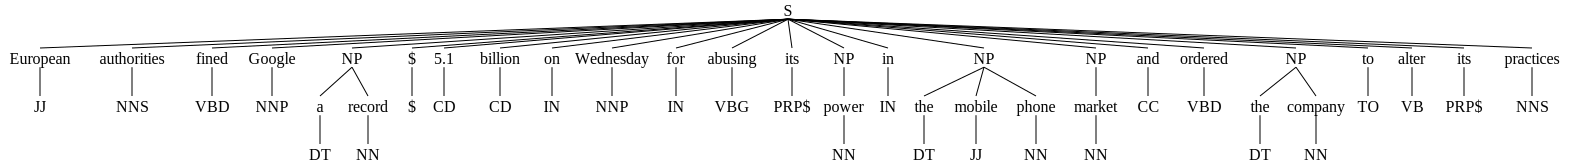

In [11]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
cs

IOB tags have become the standard way to represent chunk structures in files, and we will also be using this format.

In [14]:
from nltk.chunk import conlltags2tree, tree2conlltags, ne_chunk
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


We can construct a tagger that can be used to label new sentences; and use the nltk.chunk.conlltags2tree() function to convert the tag sequences into a chunk tree. With the function nltk.ne_chunk(), we can recognize named entities using a classifier, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

In [15]:
ne_tree = ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)
